In [174]:
import pandas as pd
import seaborn as sns
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
# pd.set_option('display.max_rows', None)


folder = 'C:/Users/Deepak/Dropbox/ActiveMassTransport_Vorticella_SinkingAggregates/RotationalAnalysis/FinalAnalysis'
analysis_file = 'RotationalAnalysis_combined.csv'

df = pd.read_csv(os.path.join(folder, analysis_file))

df['angular speed (1/s)'] = (df['angular velocity x']**2 + df['angular velocity y']**2 + df['angular velocity z']**2)**(1/2)
df['no:of vorticella'] = np.nan
# No:of vorticella mapping
df_num_vorticella = pd.read_csv(os.path.join(folder, 'Sphere_Vorticella_numbers.csv'))


for ii in range(len(df_num_vorticella)):
    
    track_id = df_num_vorticella['track ID'][ii]
    
    df['no:of vorticella'].loc[df['track ID'] == track_id] = int(df_num_vorticella['number of vorticella'][ii])
    
df

C:\Users\Deepak\Anaconda3\envs\gm_py3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Unnamed: 0  Time (s)   track ID  \
0              0      3.21  Sphere003   
1              1      4.62  Sphere003   
2              2      5.99  Sphere003   
3              3      7.42  Sphere003   
4              4      8.79  Sphere003   
...          ...       ...        ...   
1005          17     45.56  Sphere015   
1006          18     47.17  Sphere015   
1007          19     48.76  Sphere015   
1008          20     50.41  Sphere015   
1009          21     52.02  Sphere015   

                                             track file  angular velocity x  \
0     H:/2019 Monterey Trip/Vorticella_GM/2019_08_21...            0.011282   
1     H:/2019 Monterey Trip/Vorticella_GM/2019_08_21...            0.011616   
2     H:/2019 Monterey Trip/Vorticella_GM/2019_08_21...            0.009606   
3     H:/2019 Monterey Trip/Vorticella_GM/2019_08_21...            0.004739   
4     H:/2019 Monterey Trip/Vorticella_GM/2019_08_21...            0.005074   
...                                                 ...                 ...   
1005  D:/Vorticella_GravityMachine/2019_08_23/track8...            0.000307   
1006  D:/Vorticella_GravityMachine/2019_08_23/track8...            0.001029   
1007  D:/Vorticella_GravityMachine/2019_08_23/track8...            0.002599   
1008  D:/Vorticella_GravityMachine/2019_08_23/track8...            0.000207   
1009  D:/Vorticella_GravityMachine/2019_08_23/track8...           -0.004495   

      angular velocity y  angular velocity z  object radius (mm)  \
0               0.011064            0.003670               0.381   
1               0.007746            0.001117               0.381   
2               0.008493           -0.002662               0.381   
3               0.014169           -0.006719               0.381   
4               0.020293           -0.009254               0.381   
...                  ...                 ...                 ...   
1005           -0.003121            0.000018               0.815   
1006           -0.001388            0.001920               0.815   
1007            0.000316           -0.001841               0.815   
1008           -0.000068           -0.000577               0.815   
1009           -0.003277            0.000649               0.815   

      angular speed (1/s)  no:of vorticella  
0                0.016223               1.0  
1                0.014006               1.0  
2                0.013096               1.0  
3                0.016382               1.0  
4                0.022873               1.0  
...                   ...               ...  
1005             0.003136               0.0  
1006             0.002582               0.0  
1007             0.003201               0.0  
1008             0.000617               0.0  
1009             0.005601               0.0  

[1010 rows x 10 columns]

In [175]:
# Figure parameters
from matplotlib import rcParams
from matplotlib import rc
params = {
   'axes.labelsize': 10,
   'legend.fontsize': 10,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'text.usetex': False,
   'figure.figsize': [5, 5]
   }
rcParams.update(params)
rc('font', family='sans-serif') 
rc('font', serif='Helvetica') 
rcParams.update({'font.size': 10})
sns.set_style("ticks")


# Estimate for rotaion rate based on known vorticella parameters

In [176]:
F_vorticella = 200e-12 # Point force due to Vorticella
a = 1e-3*np.nanmean(df['object radius (mm)'])
print("mean aggregate radius: {} mm".format(a))
mu_water = 0.001 # Viscosity of water in Pa.s
# \Omega = F/(8\pi \mu a^2)
Omega = F_vorticella/(8*np.pi*mu_water*a**2)

print("Predicted rotation rate {} 1/s".format(Omega))


mean aggregate radius: 0.0005256237623762376 mm
Predicted rotation rate 0.028803161190727615 1/s


## Rotation rate distribution vs no:of vorticella

<IPython.core.display.Javascript object>


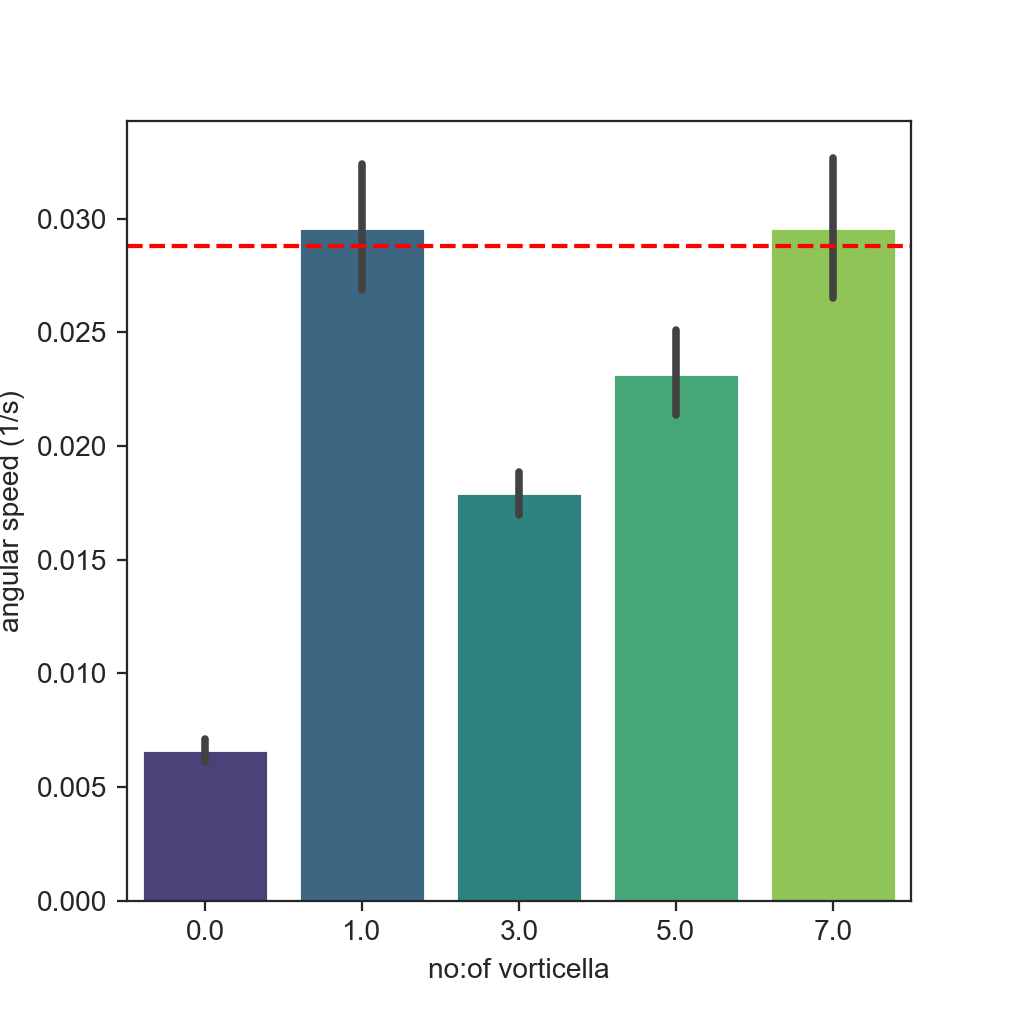

<IPython.core.display.Javascript object>


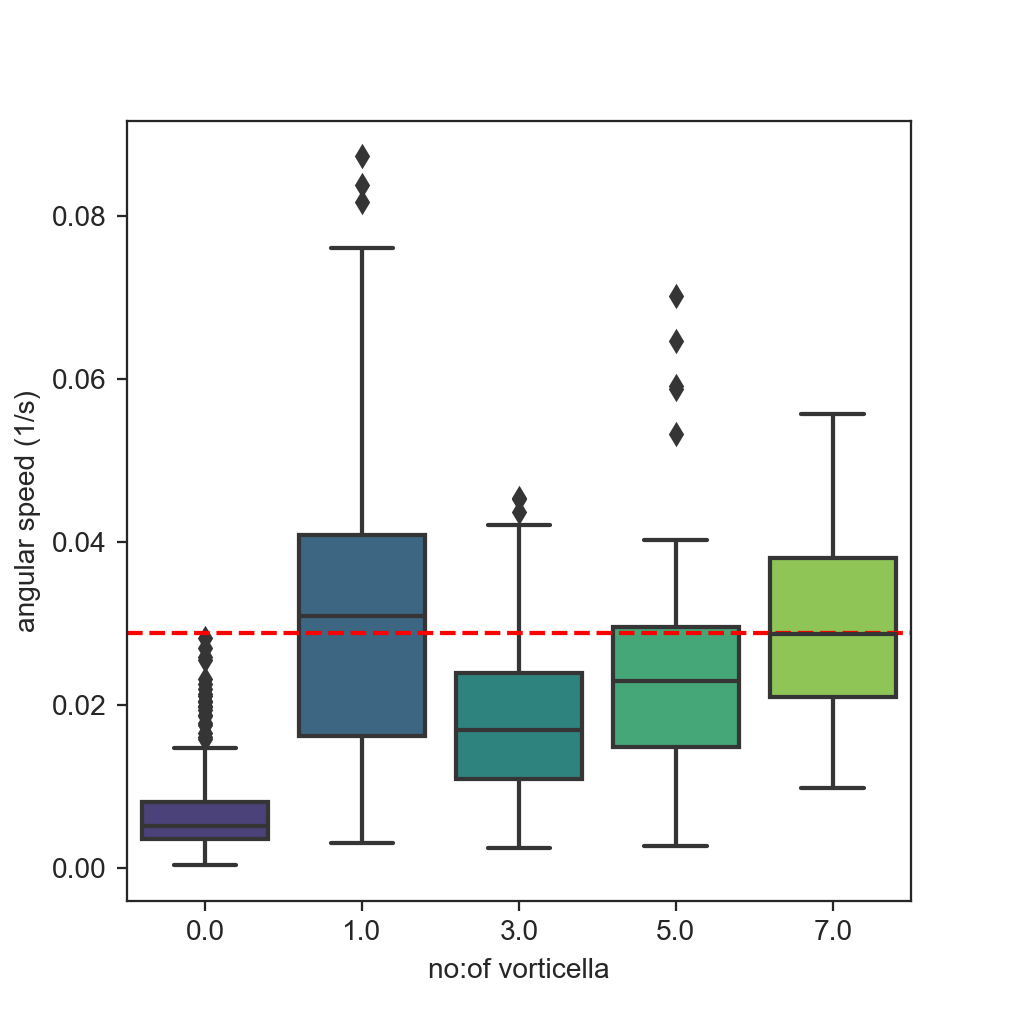

<IPython.core.display.Javascript object>


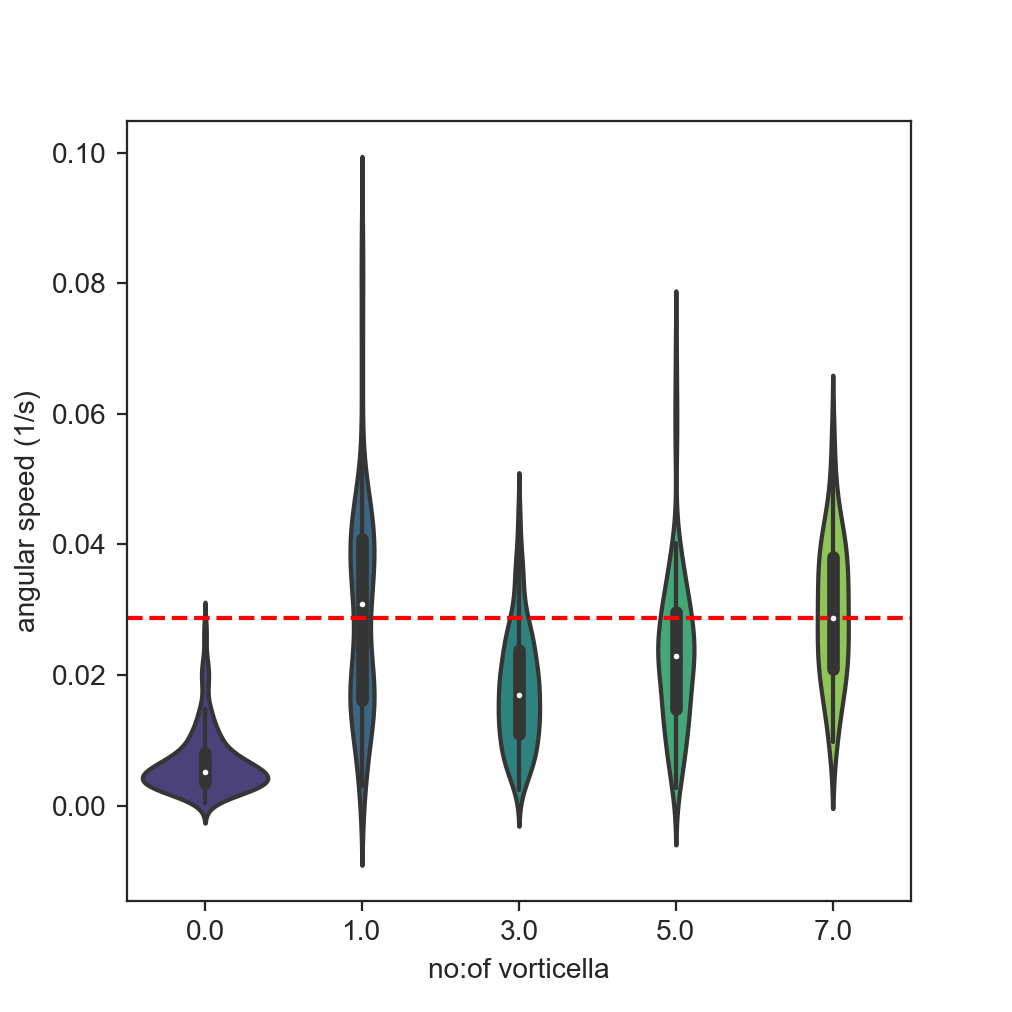

In [177]:
# # Angular speed vs no:of vorticella (Bar-plot)
save = False

plt.figure()
ax1 = sns.barplot(x="no:of vorticella", y="angular speed (1/s)", data=df, palette="viridis")
ax1.axhline(Omega, ls='--', color = 'r')

if(save):
    plt.savefig('AngularSpeed_vs_numOfVorticella_Bar'+'.svg', dpi =300)
    plt.savefig('AngularSpeed_vs_numOfVorticella_Bar'+'.png', dpi =300)

# Angular speed vs no:of vorticella (Box-plot)
plt.figure()
ax = sns.boxplot(x="no:of vorticella", y="angular speed (1/s)", data=df, palette="viridis")
ax.axhline(Omega, ls='--', color = 'r')

if(save):
    plt.savefig('AngularSpeed_vs_numOfVorticella_BoxPlot'+'.svg', dpi =300)
    plt.savefig('AngularSpeed_vs_numOfVorticella_BoxPlot'+'.png', dpi =300)

# # Angular speed vs no:of vorticella (Violin-plot)
plt.figure()
ax1 = sns.violinplot(x="no:of vorticella", y="angular speed (1/s)", data=df, palette="viridis")
ax1.axhline(Omega, ls='--', color = 'r')

if(save):
    plt.savefig('AngularSpeed_vs_numOfVorticella_Violin'+'.svg', dpi =300)
    plt.savefig('AngularSpeed_vs_numOfVorticella_Violin'+'.png', dpi =300)


# Box plot: The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, 
# except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

<IPython.core.display.Javascript object>


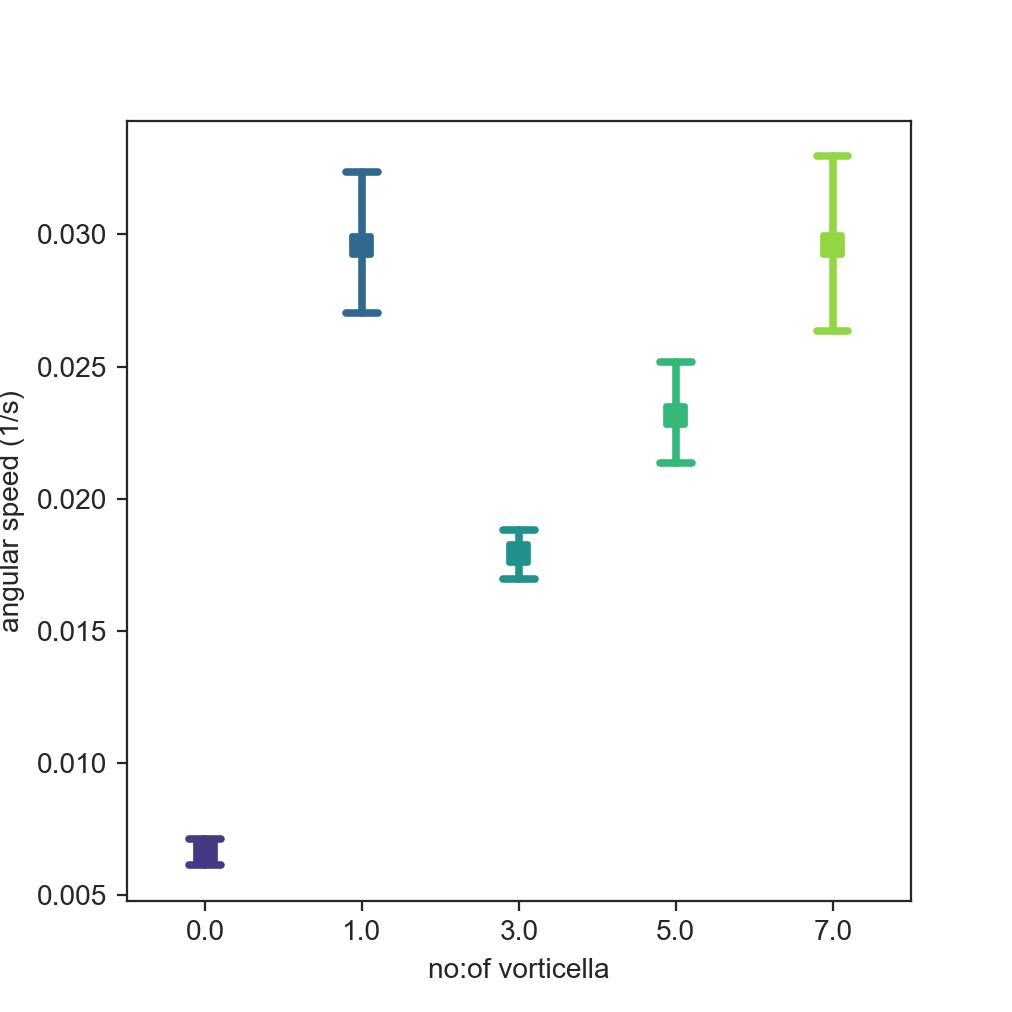

In [139]:
# # Angular speed vs no:of vorticella (Scatter plot)
plt.figure()
ax1 = sns.pointplot(x="no:of vorticella", y="angular speed (1/s)", data=df, palette="viridis", capsize=0.2, markers='s')
if(save):
    plt.savefig('AngularSpeed_vs_numOfVorticella_ScatterPlot'+'.svg', dpi =300)
    plt.savefig('AngularSpeed_vs_numOfVorticella_ScatterPlot'+'.png', dpi =300)

# Distribution of rotation rate and orientation

<IPython.core.display.Javascript object>


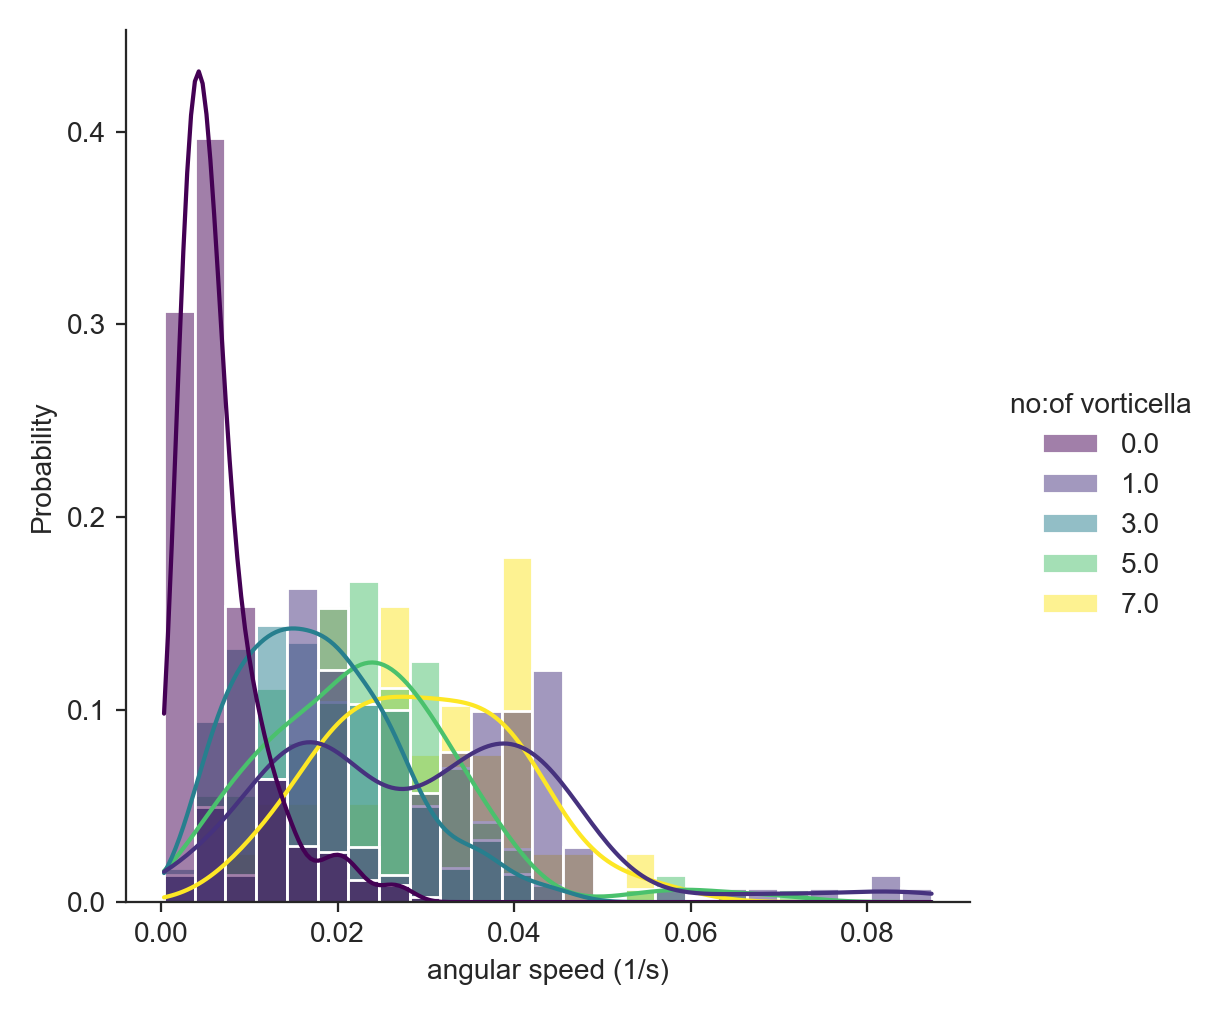

In [9]:
sns.displot(df, x="angular speed (1/s)", hue = "no:of vorticella", common_norm=False, stat="probability", kde=True, palette="viridis")


In [21]:
from scipy.stats import ttest_ind

dist_1 = df.loc[df['no:of vorticella']==0.0, 'angular speed (1/s)']
dist_2 = df.loc[df['no:of vorticella']==7.0, 'angular speed (1/s)']
res = ttest_ind(dist_1, dist_2, equal_var = False)

print(res)

Ttest_indResult(statistic=-13.352375827083033, pvalue=2.783164173591493e-16)


In [ ]:
# Plot the orientation distribution of the angular velocity orientation

['H:/2019 Monterey Trip/Vorticella_GM/2019_08_21_Afternoon/Track8/track000.csv', 'H:/2019 Monterey Trip/Vorticella_GM/2019_08_22/track9/track000.csv', 'H:/2019 Monterey Trip/Vorticella_GM/2019_08_22_afterdinner/track7/track000.csv']


<IPython.core.display.Javascript object>


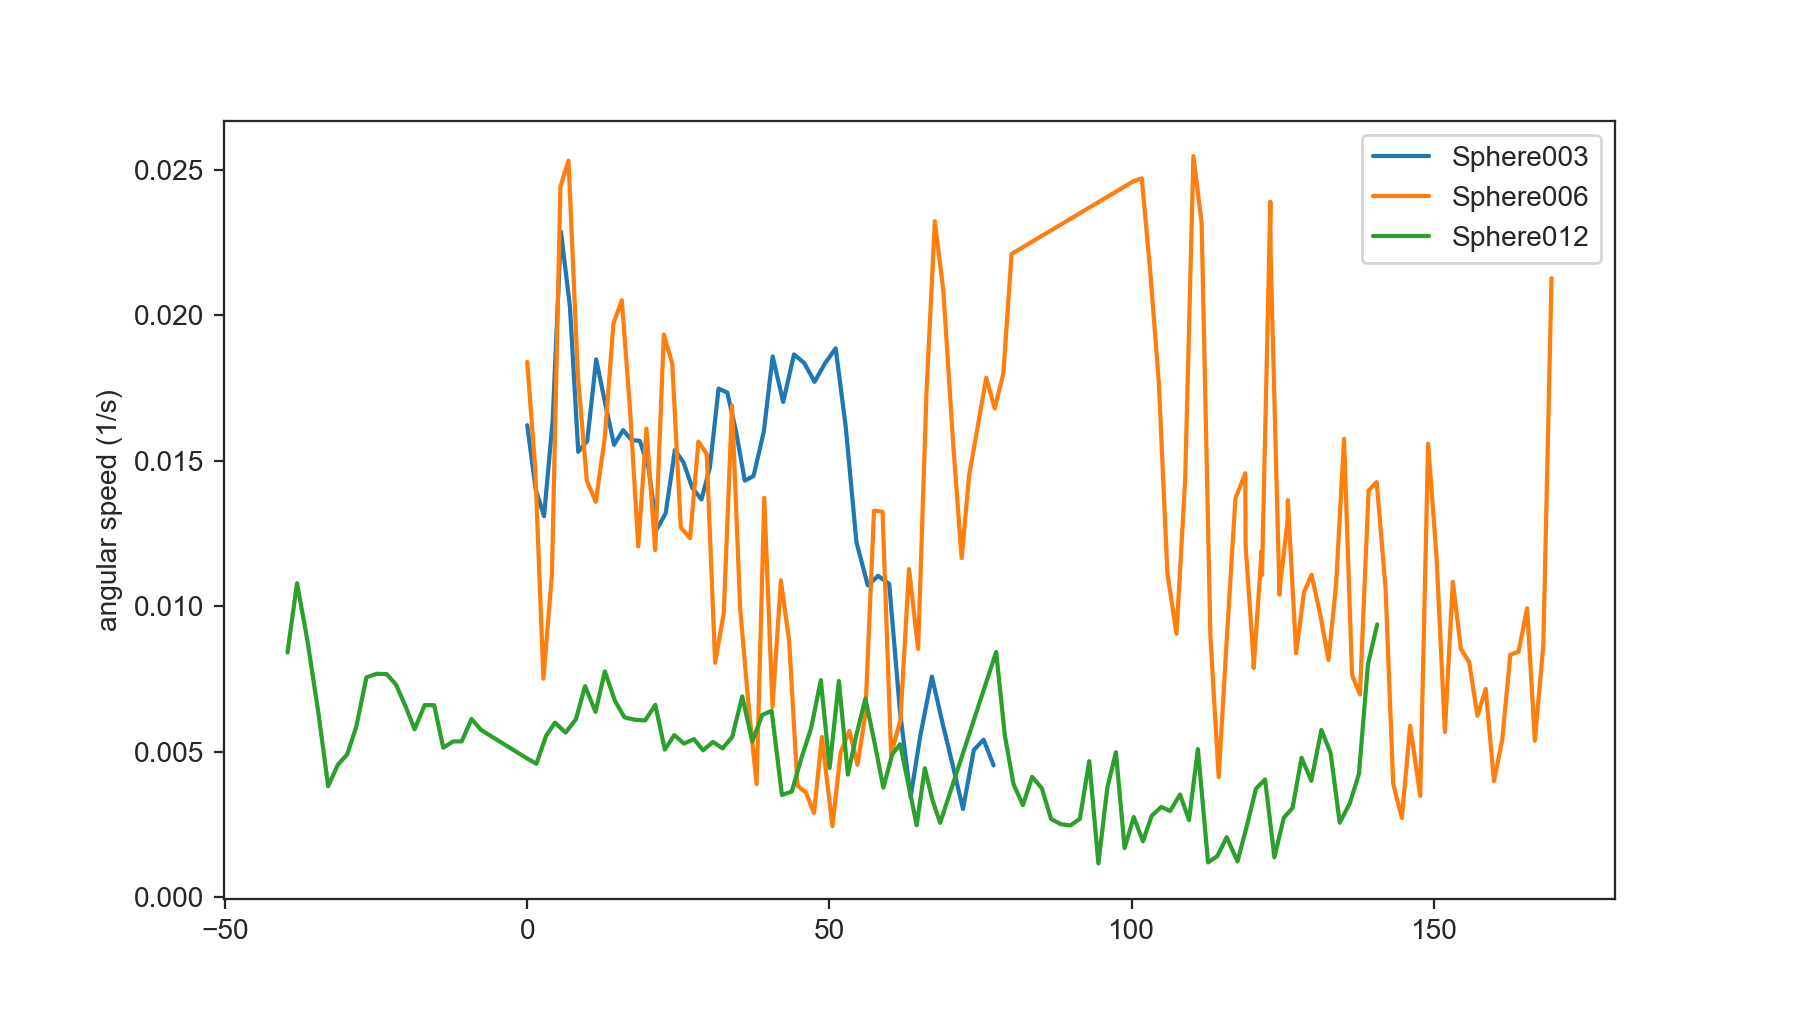

Sphere003
[ 0.    1.41  2.78  4.21  5.58  7.07  8.44  9.93 11.41 12.89 14.36 15.86
 17.25 18.63 20.05 21.44 22.9  24.43 25.85 27.3  28.82 30.21 31.65 33.1
 34.57 35.99 37.44 39.14 40.6  42.34 44.13 45.83 47.53 49.23 51.02 52.68
 54.46 56.34 58.04 59.88 61.66 63.42 65.   66.94 68.7  70.41 72.08 73.88
 75.5  77.15]
Sphere006
[  0.     1.33   2.68   4.09   5.49   6.83   8.38   9.87  11.35  12.85
  14.26  15.65  17.    18.37  19.72  21.17  22.6   23.99  25.4   26.94
  28.32  29.69  31.08  32.51  33.88  35.22  36.57  37.94  39.21  40.57
  41.96  43.32  44.7   46.1   47.44  48.74  50.49  51.84  53.29  54.63
  55.93  57.37  58.78  60.19  61.73  63.16  64.66  66.05  67.43  68.84
  70.46  71.86  73.1   74.47  75.93  77.33  78.77  80.12 100.28 101.66
 103.08 104.49 105.9  107.4  108.84 110.2  111.56 113.01 114.38 115.79
 117.15 118.78 120.11 121.48 122.93 124.44 125.78 118.84 120.17 121.54
 122.97 124.49 125.82 127.19 128.49 129.75 131.19 132.55 133.8  135.12
 136.44 137.75 139.18 140.52 141.99 

In [131]:
# Plot time series by stitching together data that belongs to the same track.
# track_name_1 = 'H:/2019 Monterey Trip/Vorticella_GM/2019_08_21_Afternoon/Track10/track000.csv'

track_list = df['track file'].unique()

track_list = ['H:/2019 Monterey Trip/Vorticella_GM/2019_08_21_Afternoon/Track8/track000.csv', 
              'H:/2019 Monterey Trip/Vorticella_GM/2019_08_22/track9/track000.csv',
             'H:/2019 Monterey Trip/Vorticella_GM/2019_08_22_afterdinner/track7/track000.csv']
print(track_list)

plt.figure()
for track_name in track_list:
    track_ID = np.array(df.loc[df['track file']==track_name, 'track ID'])
    print(track_ID[0])
    time_array = np.array(df.loc[df['track file']==track_name, 'Time (s)'])
    time_array = time_array - time_array[0]
    print(time_array)
    sns.lineplot(x = time_array, y = df.loc[df['track file']==track_name, 'angular speed (1/s)'], label = track_ID[0]) 

plt.legend()
plt.show()

# Angular velocity orientation

In [179]:

# Convert from cartesian to spherical coordinates for the velocity orientation
df['p_x'] = df['angular velocity x']/df['angular speed (1/s)']
df['p_y'] = df['angular velocity y']/df['angular speed (1/s)']
df['p_z'] = df['angular velocity z']/df['angular speed (1/s)']

df['p_theta'] = np.arctan2((df['p_x']**2+df['p_y']**2)**(1/2), abs(df['p_z']))
df['p_phi'] = np.arctan2(df['p_y'], df['p_x'])



<IPython.core.display.Javascript object>


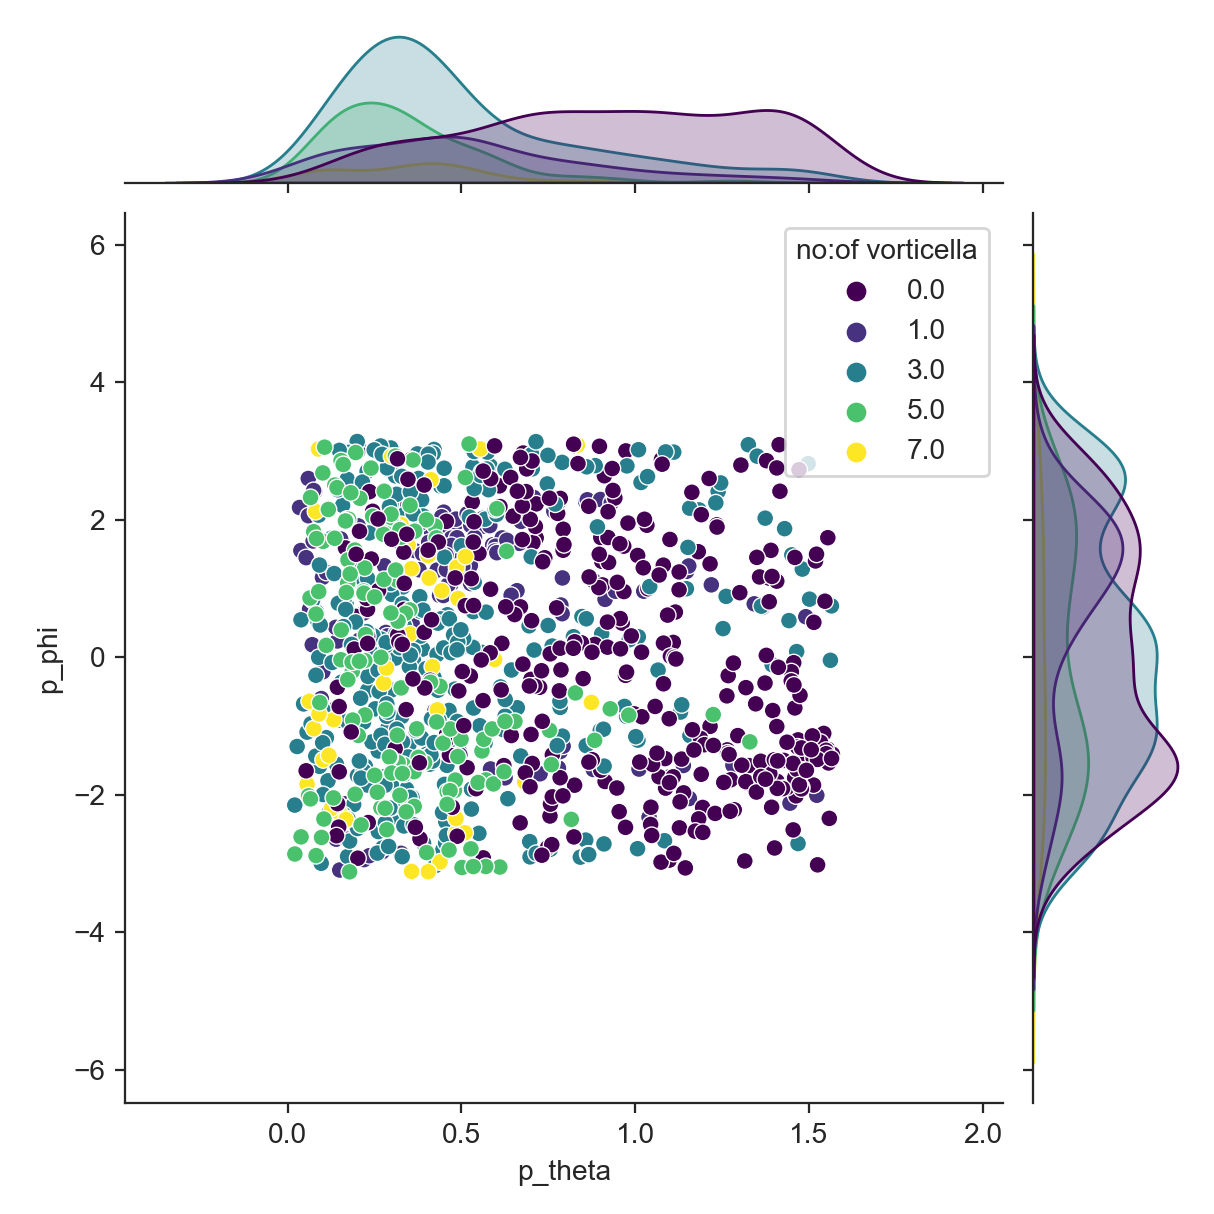

In [180]:
# Joint plot of p_theta vs p_phi
save = False
sns.jointplot(data = df, x="p_theta", y="p_phi", hue = "no:of vorticella", palette="viridis")
if(save):
    plt.savefig('p_phi_vs_p_theta_joint_dist'+'.svg', dpi =300)
    plt.savefig('p_phi_vs_p_theta_joint_dist'+'.png', dpi =300)

<IPython.core.display.Javascript object>


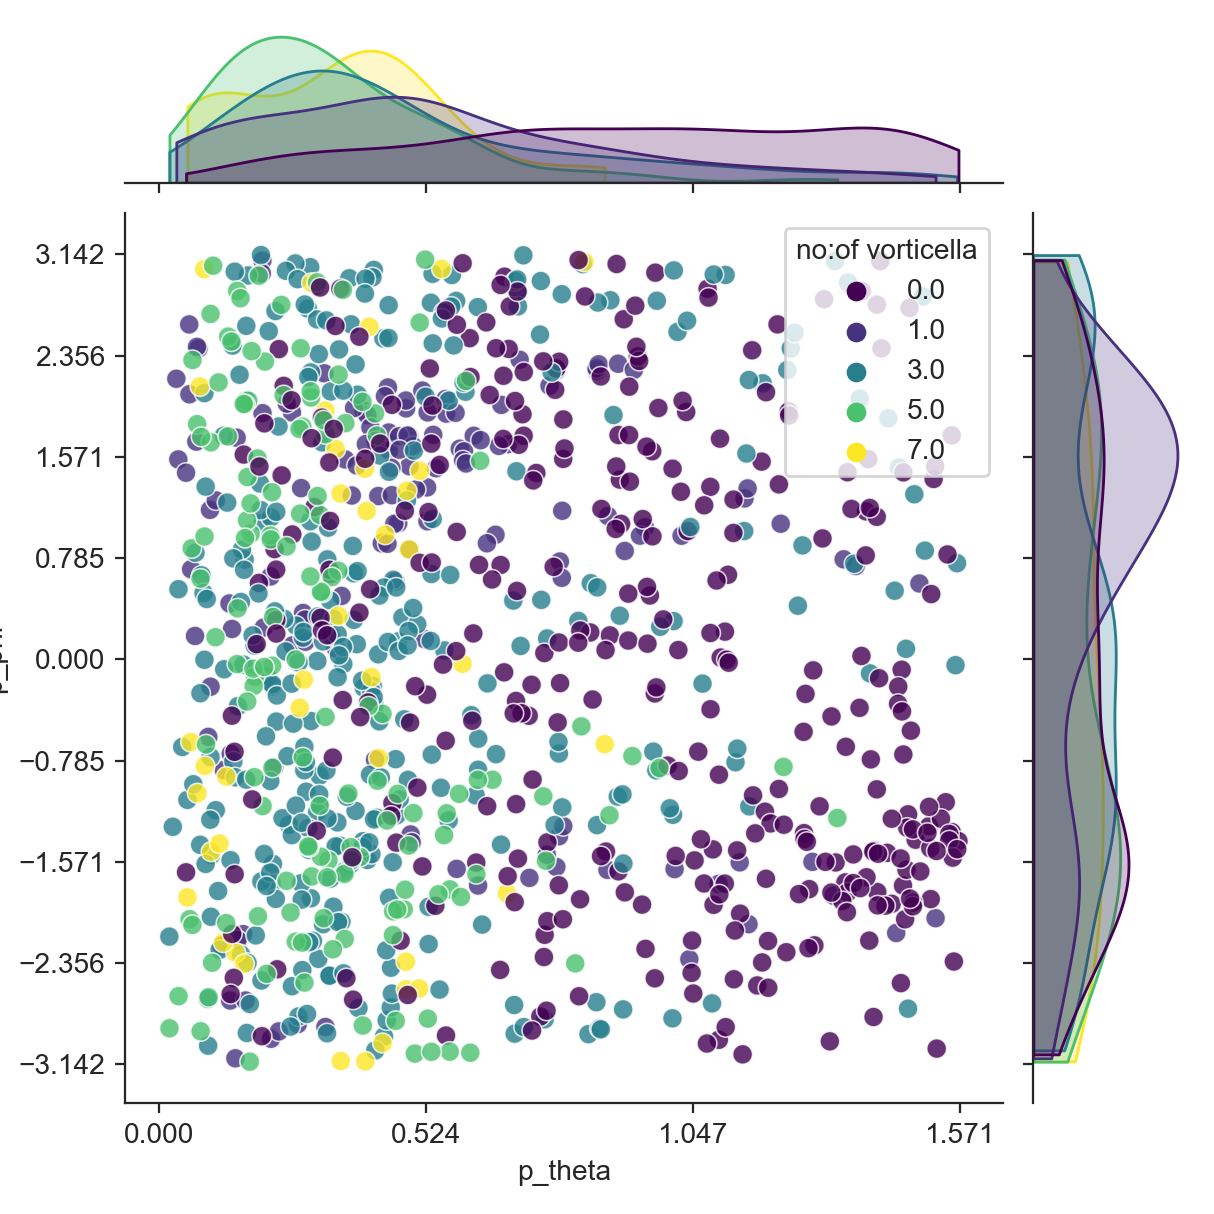

In [187]:
# JointGrid (KDE)
save = True
g = sns.JointGrid(data = df, x="p_theta", y="p_phi", hue = "no:of vorticella", palette="viridis")
sns.scatterplot(x="p_theta", y="p_phi", hue = "no:of vorticella", palette="viridis", s= 50, alpha =0.8, ax = g.ax_joint, data = df)
sns.kdeplot(x="p_theta", hue = "no:of vorticella", palette="viridis", common_norm = False, ax = g.ax_marg_x, data = df, fill = True, legend = False, cut = 0)

sns.kdeplot(y="p_phi", hue = "no:of vorticella", palette="viridis", common_norm = False, ax = g.ax_marg_y, data = df, fill = True,legend = False, cut = 0)
x_ticks = [0, np.pi/6, 2*np.pi/6, 3*np.pi/6]
g.ax_marg_x.set_xticks(x_ticks)

y_ticks = [-np.pi, -3*np.pi/4, -2*np.pi/4, -1*np.pi/4, 0, np.pi, 3*np.pi/4, 2*np.pi/4, 1*np.pi/4]
g.ax_marg_y.set_yticks(y_ticks)
if(save):
    plt.savefig('p_phi_vs_p_theta_joint_dist_kde'+'.svg', dpi =300)
    plt.savefig('p_phi_vs_p_theta_joint_dist_kde'+'.png', dpi =300)

<IPython.core.display.Javascript object>


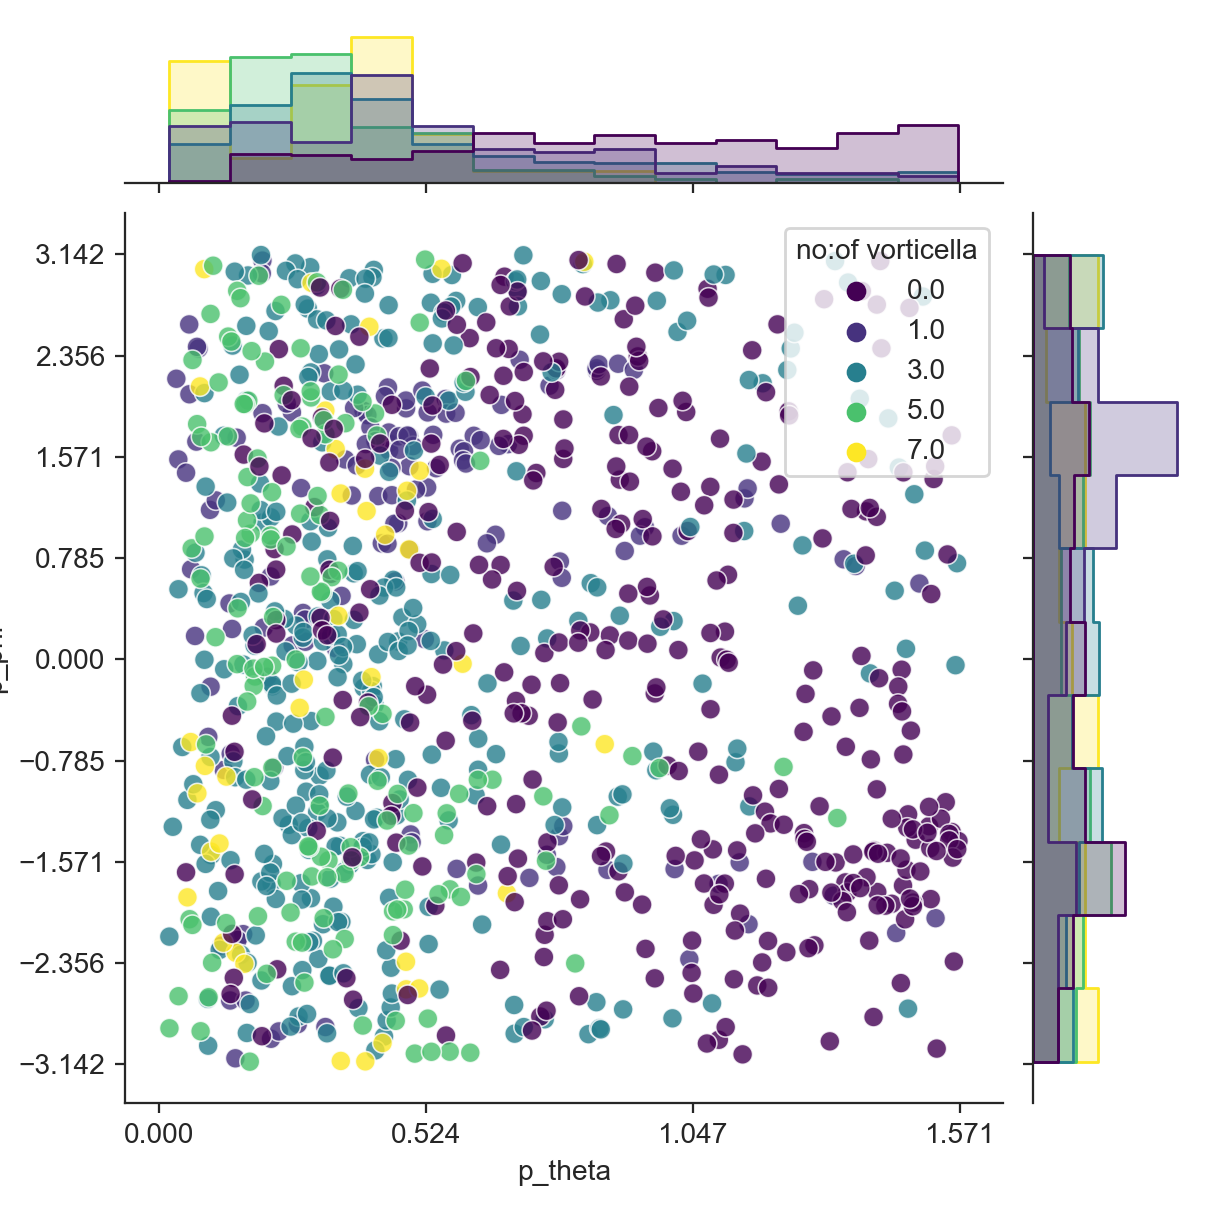

In [188]:
save = True
g = sns.JointGrid(data = df, x="p_theta", y="p_phi", hue = "no:of vorticella", palette="viridis")
sns.scatterplot(x="p_theta", y="p_phi", hue = "no:of vorticella", palette="viridis", s= 50, alpha =0.8, ax = g.ax_joint, data = df)
sns.histplot(x="p_theta", hue = "no:of vorticella", palette="viridis", stat = "probability", common_norm = False, ax = g.ax_marg_x, data = df, legend = False, element = "step")
sns.histplot(y="p_phi", hue = "no:of vorticella", palette="viridis", stat = "probability", common_norm = False, ax = g.ax_marg_y, data = df,legend = False, element = "step")

x_ticks = [0, np.pi/6, 2*np.pi/6, 3*np.pi/6]
g.ax_marg_x.set_xticks(x_ticks)

y_ticks = [-np.pi, -3*np.pi/4, -2*np.pi/4, -1*np.pi/4, 0, np.pi, 3*np.pi/4, 2*np.pi/4, 1*np.pi/4]
g.ax_marg_y.set_yticks(y_ticks)

if(save):
    plt.savefig('p_phi_vs_p_theta_joint_dist_hist'+'.svg', dpi =300)
    plt.savefig('p_phi_vs_p_theta_joint_dist_hist'+'.png', dpi =300)

<IPython.core.display.Javascript object>


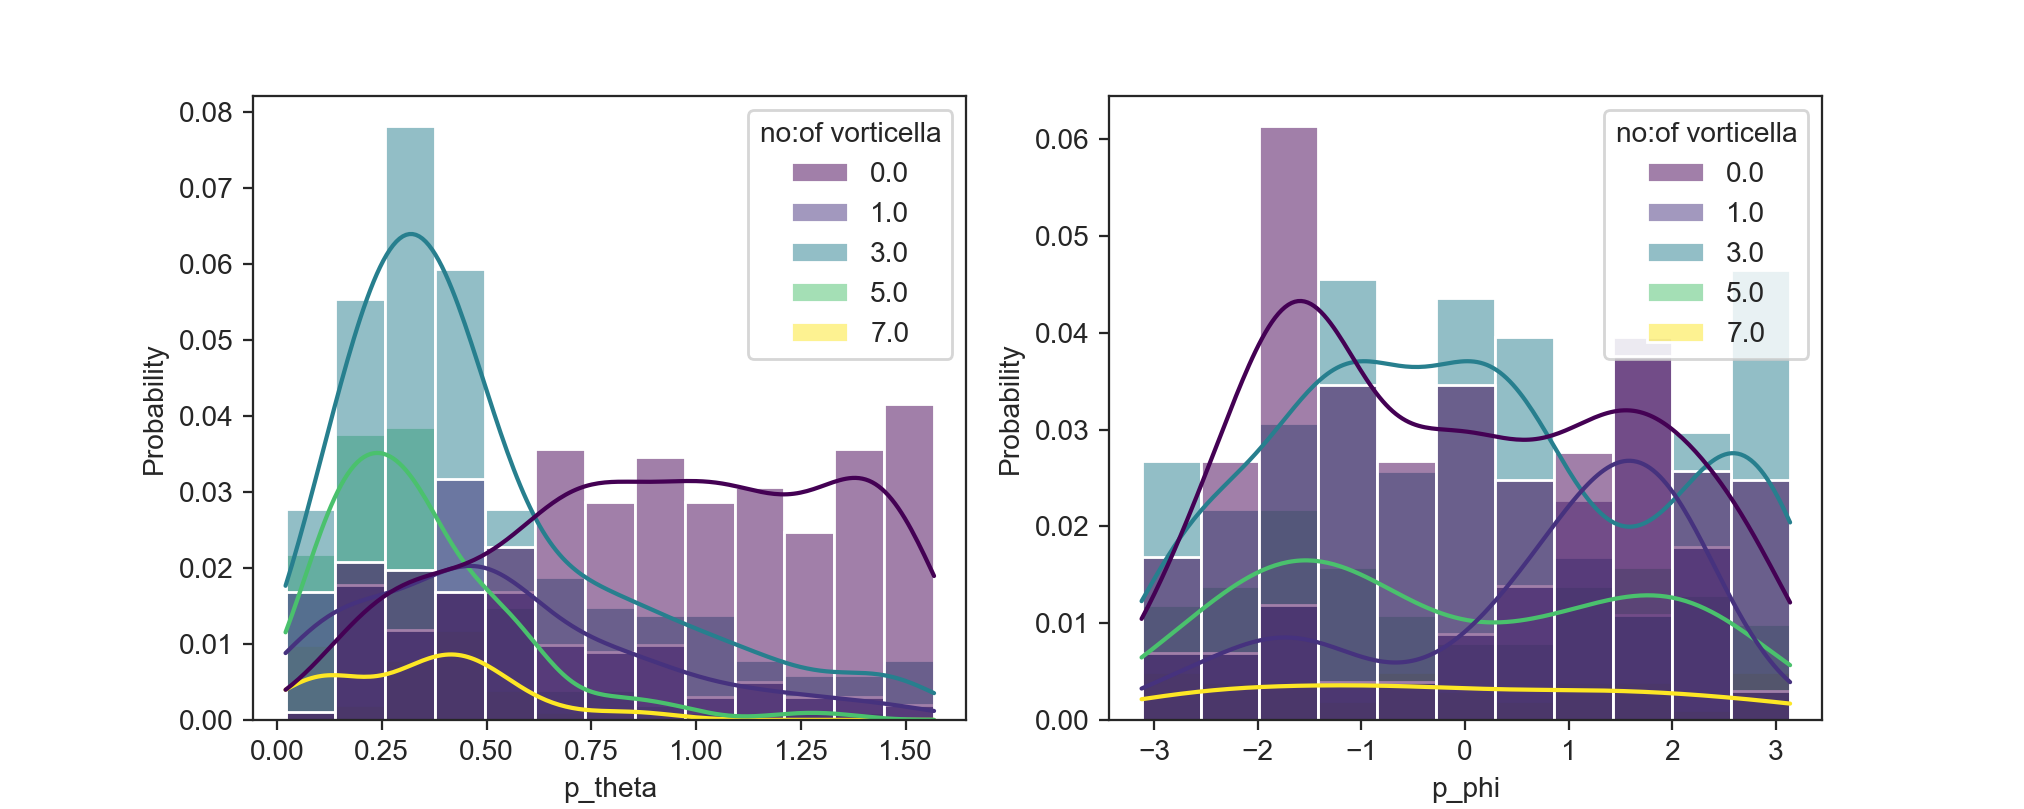

In [58]:
fig, (ax1, ax2) = plt.subplots(nrows =1, ncols = 2, figsize = (10,4))
sns.histplot(df, x = 'p_theta', hue = "no:of vorticella", stat = "probability", kde = True, palette="viridis", ax = ax1)
sns.histplot(df, x = 'p_phi', hue = "no:of vorticella", stat = "probability", kde = True, palette="viridis", ax = ax2)

if(save):
    plt.savefig('Angular velocity orientation component_spherical' + '.png', dpi = 300)
    plt.savefig('Angular velocity orientation component_spherical' + '.svg', dpi = 300)


<IPython.core.display.Javascript object>


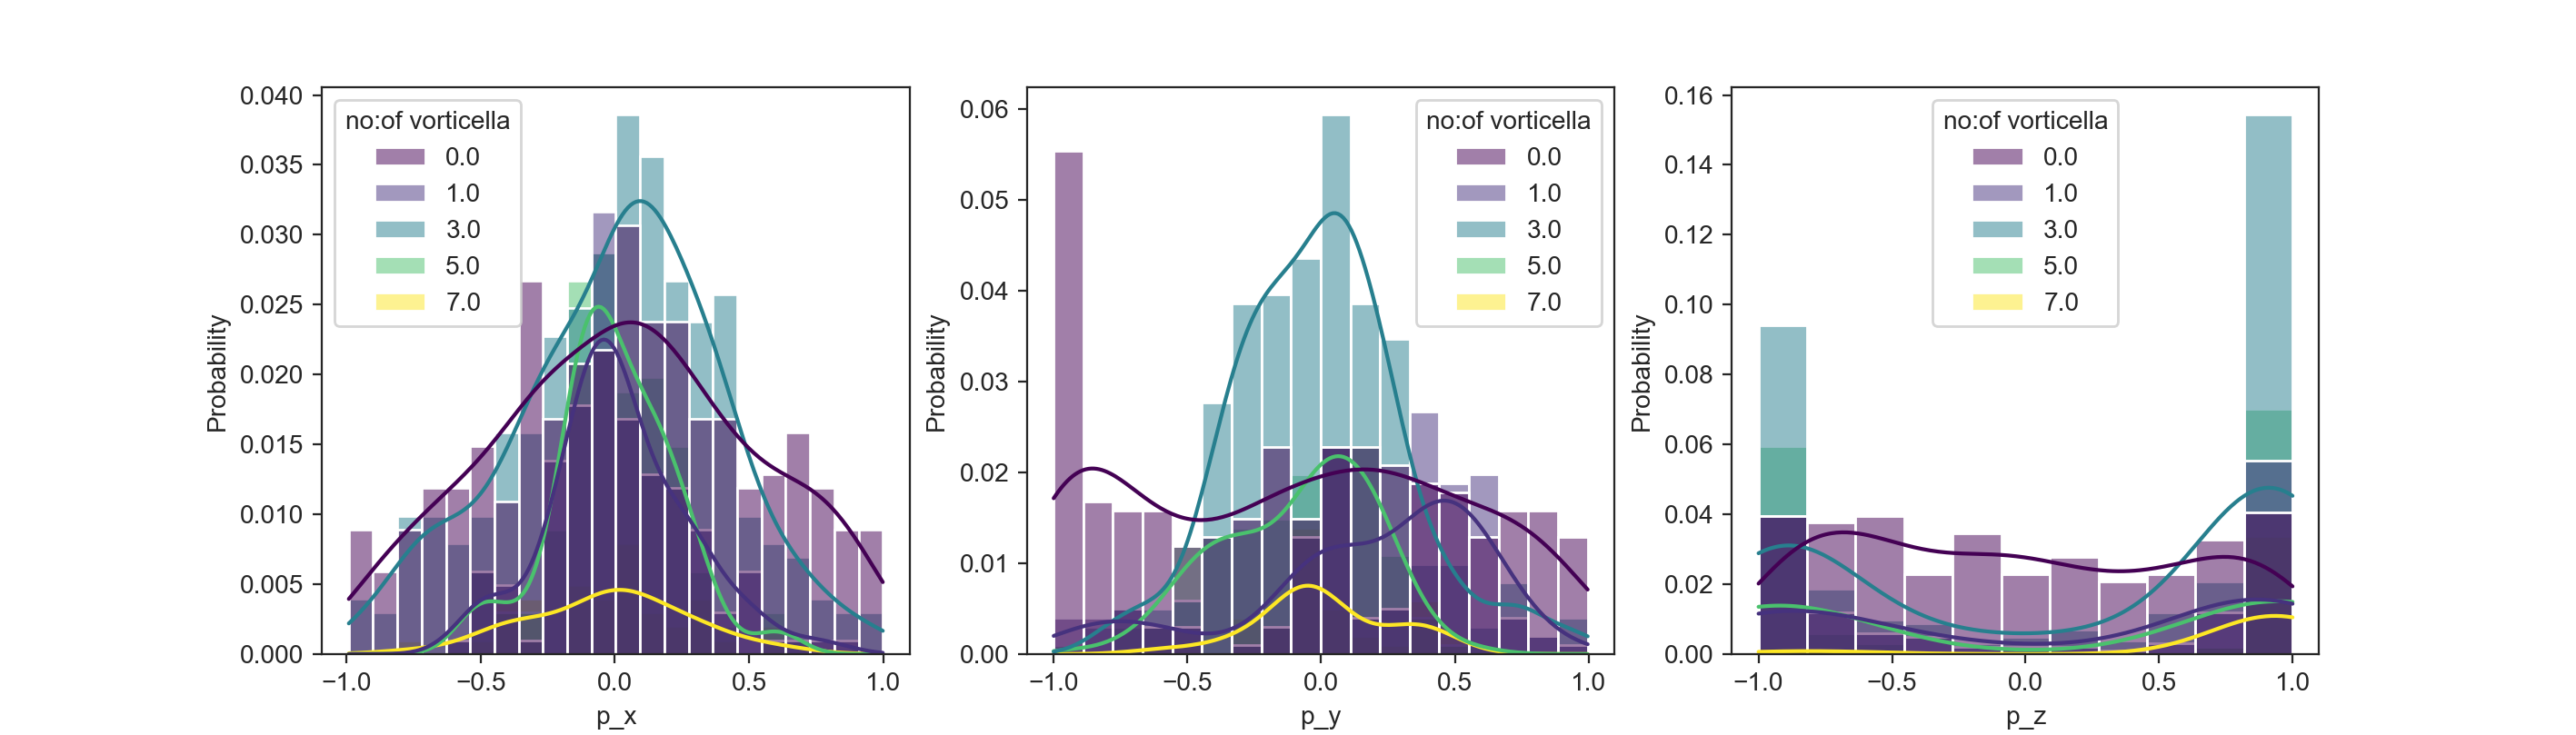

In [59]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows =1, ncols = 3, figsize = (14,4))

sns.histplot(df, x = 'p_x', hue = "no:of vorticella",  stat = "probability", kde = True, palette="viridis", ax = ax1)

sns.histplot(df, x = 'p_y', hue = "no:of vorticella",  stat = "probability", kde = True, palette="viridis", ax = ax2)

sns.histplot(df, x = 'p_z', hue = "no:of vorticella",  stat = "probability", kde = True, palette="viridis", ax = ax3)
if(save):
    plt.savefig('Angular velocity orientation component_cartesian' + '.png', dpi = 300)
    plt.savefig('Angular velocity orientation component_cartesian' + '.svg', dpi = 300)

<IPython.core.display.Javascript object>


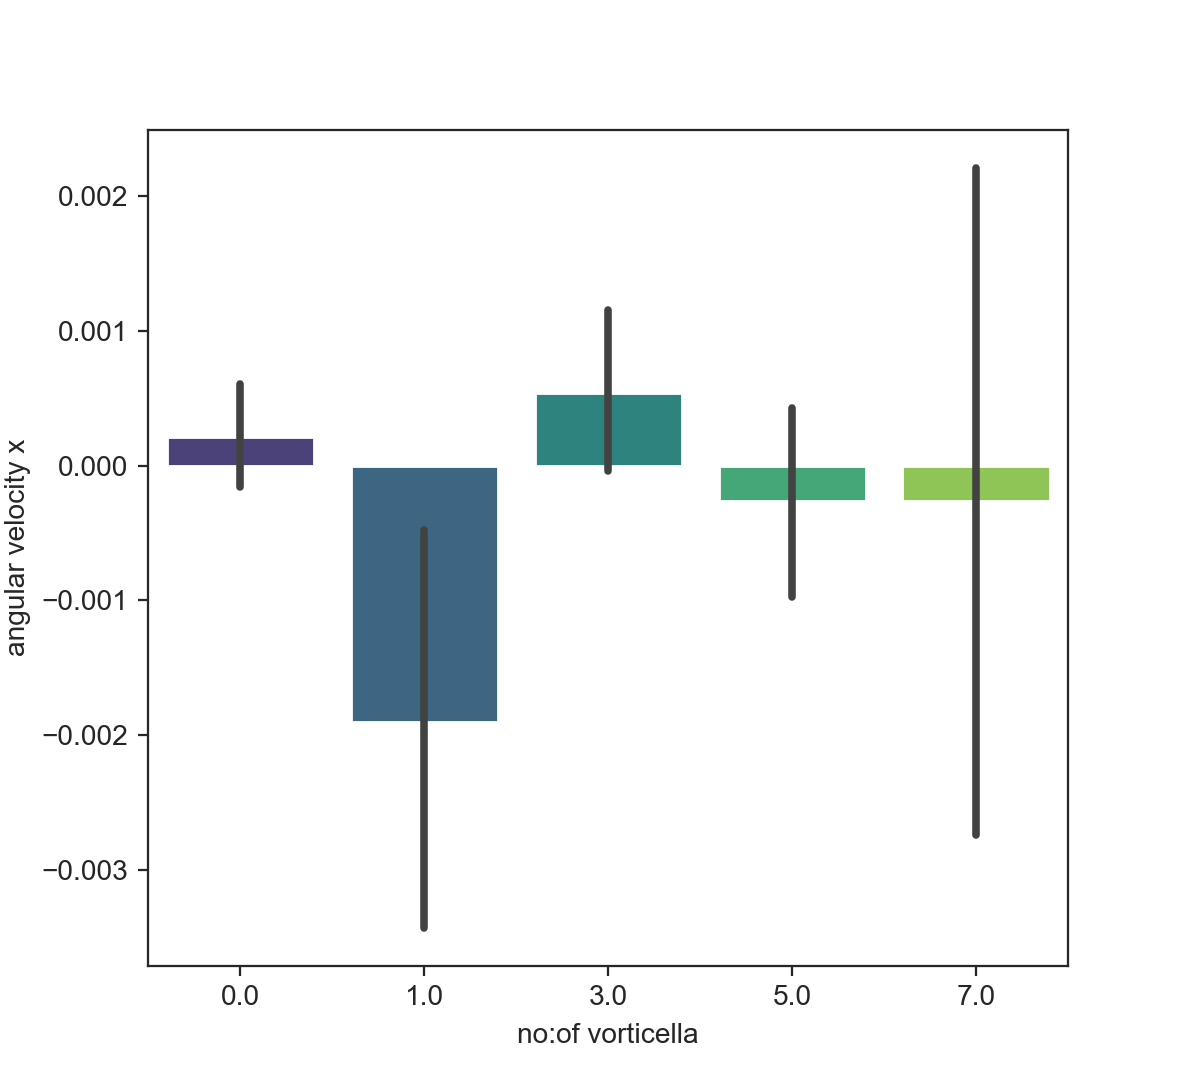

<IPython.core.display.Javascript object>


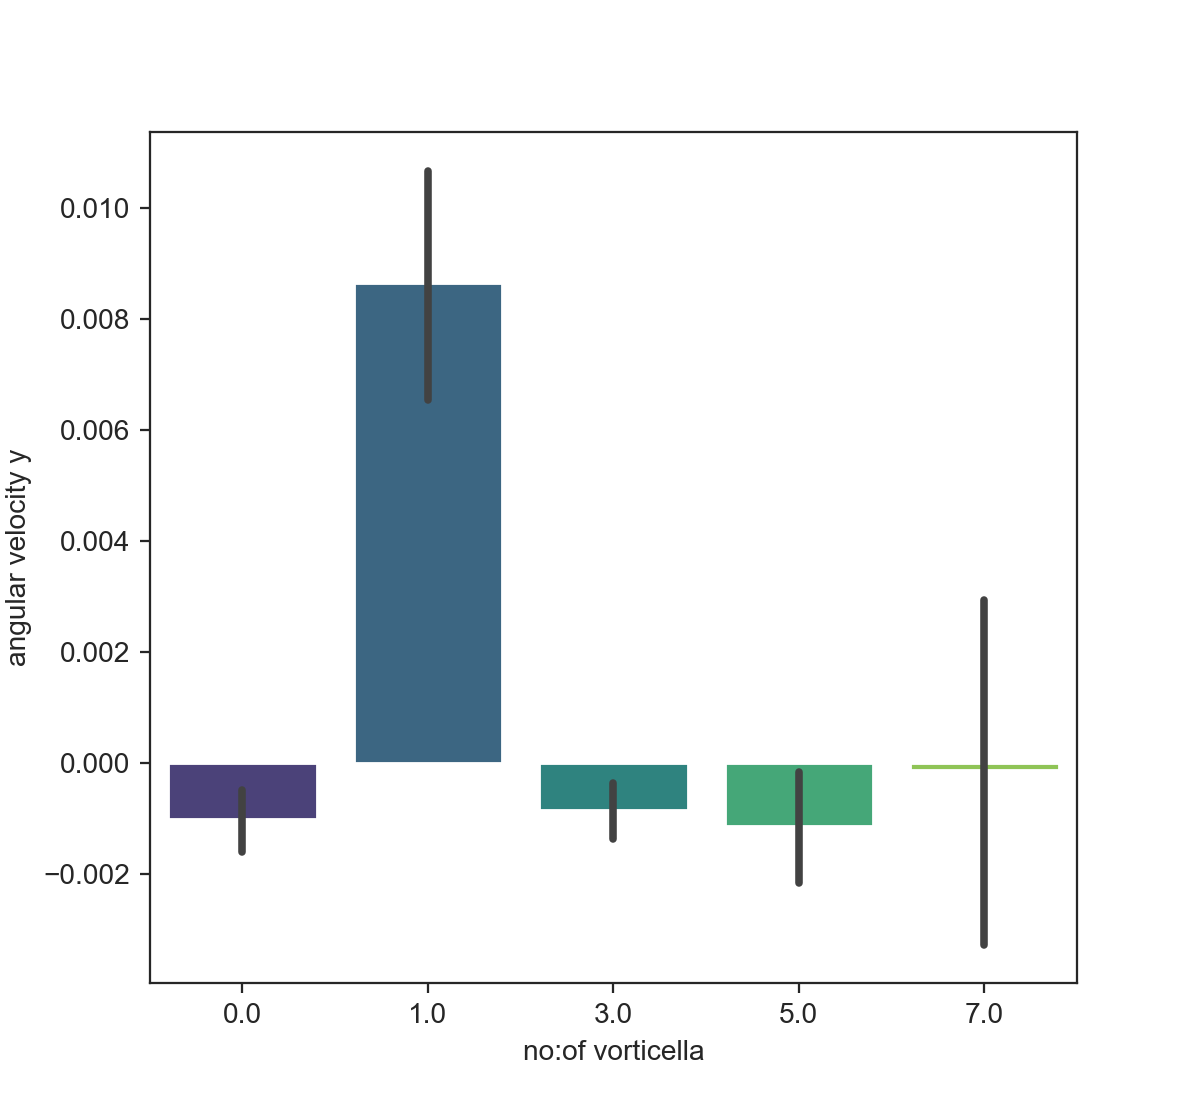

<IPython.core.display.Javascript object>


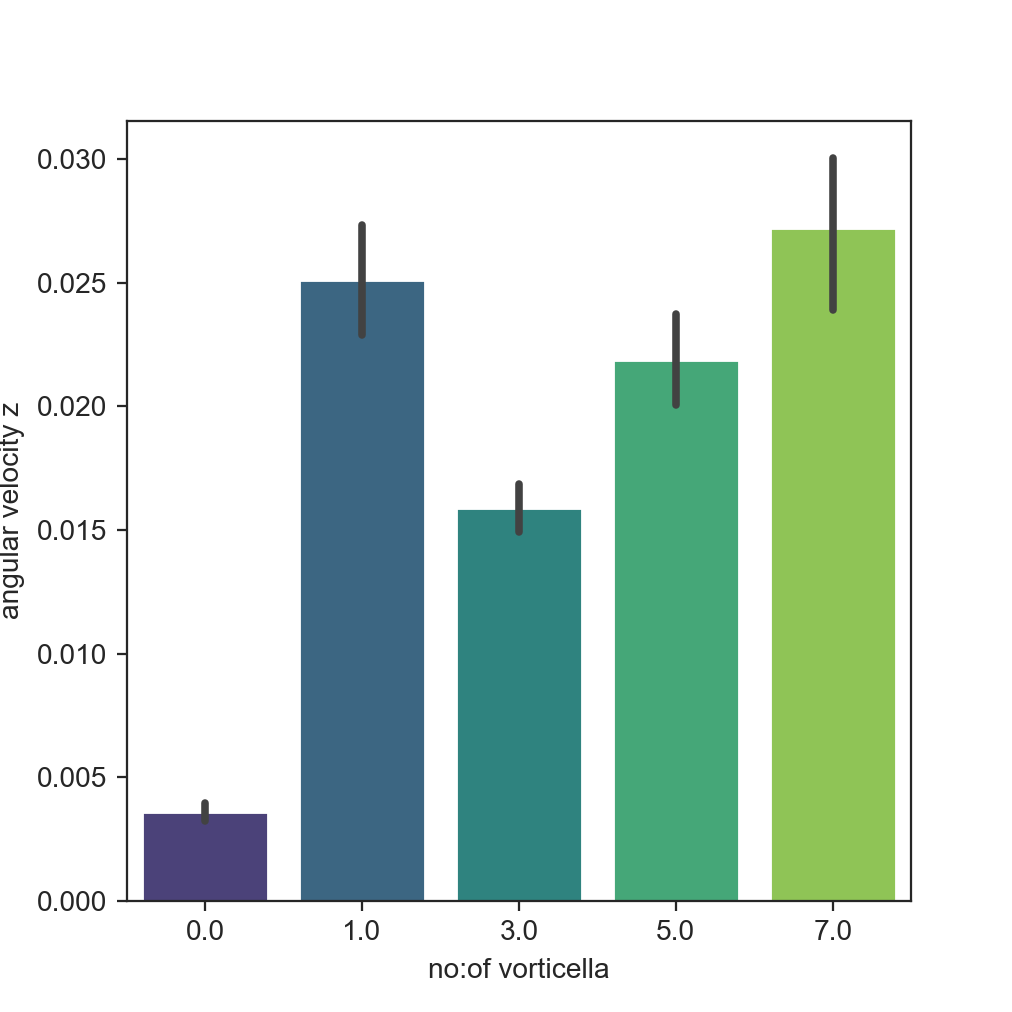

In [127]:
# Effect of vorticella on individual components of the rotation velocity vector
df['angular velocity z'] = abs(df['angular velocity z'])

plt.figure()
ax1 = sns.barplot(x="no:of vorticella", y="angular velocity x", data=df, palette="viridis")

plt.figure()
ax1 = sns.barplot(x="no:of vorticella", y="angular velocity y", data=df, palette="viridis")

plt.figure()
ax1 = sns.barplot(x="no:of vorticella", y="angular velocity z", data=df, palette="viridis")

<IPython.core.display.Javascript object>


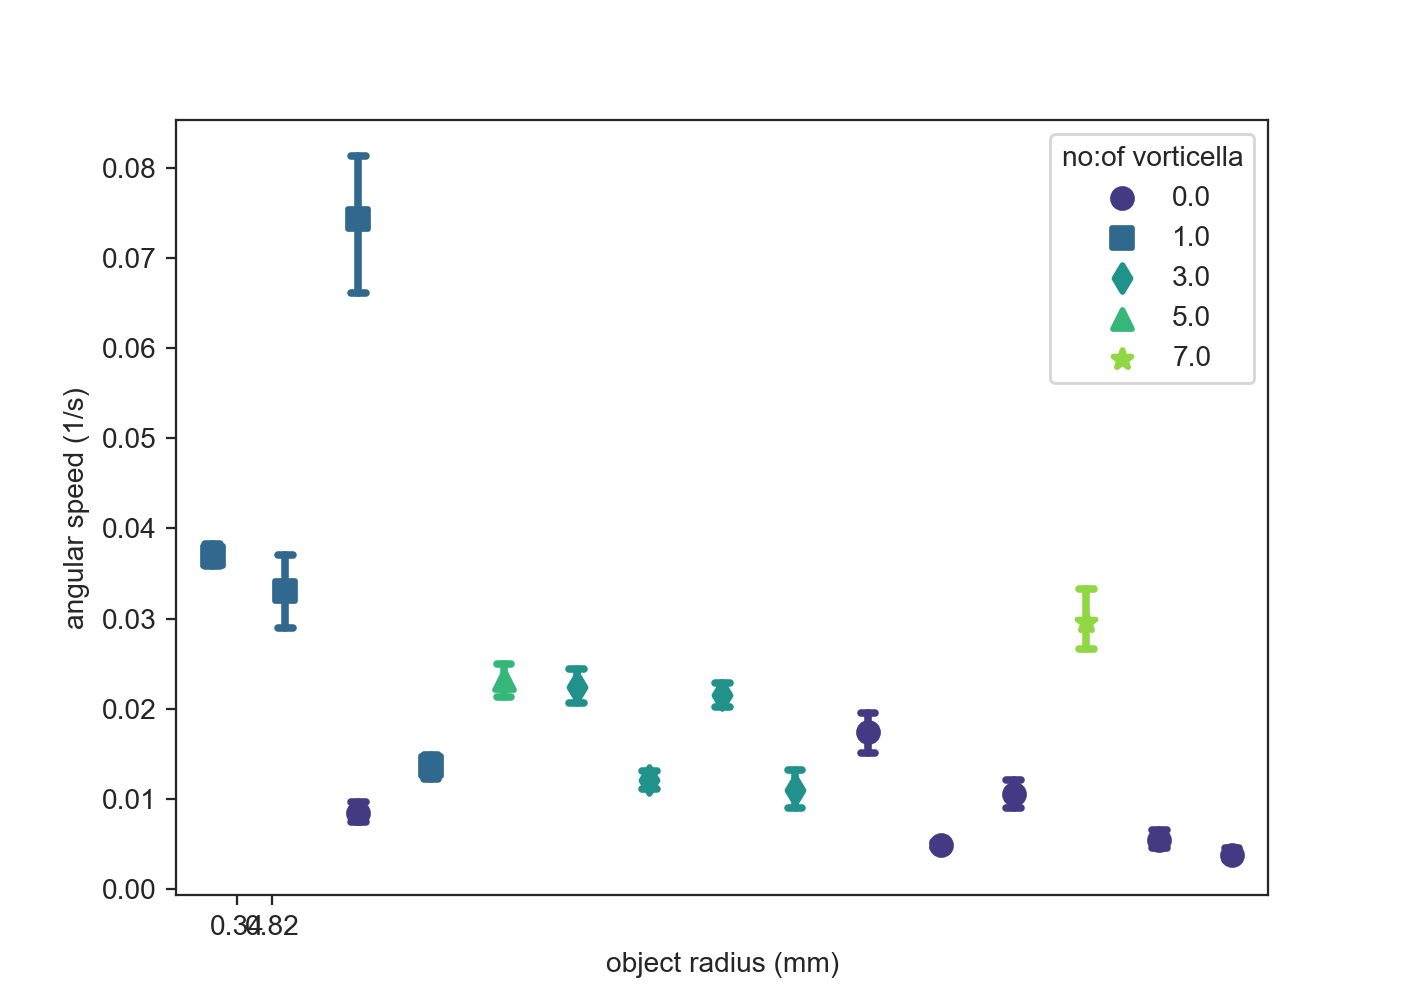

[0.34, 0.82]
['0.34', '0.82']


[Text(0, 0, '0.34'), Text(0, 0, '0.82')]

In [113]:
# Rotation rate vs sphere size (whole dataset)
markers = ['o', 's', 'd','^','*']
plt.figure()
ax1 = sns.pointplot(x="object radius (mm)", y="angular speed (1/s)", hue= "no:of vorticella", data=df, palette="viridis", capsize=0.2, join = False, markers = markers)
ticks = []
for tick_value in np.linspace(np.min(df['object radius (mm)']), np.max(df['object radius (mm)']),2):
    ticks.append(np.round(tick_value,2))

print(ticks)
ax1.set_xticks(ticks)
tick_label = []
for tick_value in ticks:
    tick_label.append(str(tick_value))

print(tick_label)
ax1.set_xticklabels(tick_label)

0.8240000000000001

[0.34 0.4  0.45 0.5  0.56 0.61 0.66 0.72 0.77 0.82]
